In [1]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [2]:
#load airbnb datasets
calendar_df=pd.read_csv('data/airbnb/calendar.csv', parse_dates=['date'])
listings_df=pd.read_csv('data/airbnb/listings.csv')
reviews_df=pd.read_csv('data/airbnb/reviews.csv', parse_dates=['date'])

# Business Understanding

Airbnb is an online platform for renting properties

# Questions

1. Does increased availability reflect in worse reviews?
2. Does length of listing description have an affect on property ratings?
3. Does listing price vary seasonally?
4. How does the size of a property relate to price?
5. Is price depenednt on location?

# 2 Data Understanding

## 2.1 Assess Calendar

In [3]:
calendar_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype         
---  ------      --------------    -----         
 0   listing_id  1393570 non-null  int64         
 1   date        1393570 non-null  datetime64[ns]
 2   available   1393570 non-null  object        
 3   price       934542 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 42.5+ MB


- price is an object

In [4]:
calendar_df.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


- price contains currency indicators

In [5]:
#price seems to have a few missing values, how many?
calendar_df.isna().sum()/(calendar_df.shape[0])

listing_id    0.00000
date          0.00000
available     0.00000
price         0.32939
dtype: float64

- price is missing on approx. 33% of rows

How is this split among available and unvaliable

In [6]:
calendar_df.query("available=='t'").isna().sum()/(calendar_df.query("available=='t'").shape[0])

listing_id    0.0
date          0.0
available     0.0
price         0.0
dtype: float64

In [7]:
calendar_df.query("available=='f'").isna().sum()/(calendar_df.query("available=='f'").shape[0])

listing_id    0.0
date          0.0
available     0.0
price         1.0
dtype: float64

- all null prices are for unavailable listings

**notes**:
- price is an object
- price contains currency indicators
- price is missing on approx. 33% of rows
- all null prices are for unavailable listings

## 3.2 Listings

### Assess

In [8]:
listings_df.head(5)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [9]:
listings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   int64  
 3   last_scraped                      3818 non-null   object 
 4   name                              3818 non-null   object 
 5   summary                           3641 non-null   object 
 6   space                             3249 non-null   object 
 7   description                       3818 non-null   object 
 8   experiences_offered               3818 non-null   object 
 9   neighborhood_overview             2786 non-null   object 
 10  notes                             2212 non-null   object 
 11  transit                           2884 non-null   object 
 12  thumbn

- from .info() all licenses are null (column could be dropped)
- only 97 non null square feet entries
- monthly price are not applicaple to all property listings 

In [10]:
null_columns_listings=list(listings_df.columns[(listings_df.isna().sum()/listings_df.shape[0])>0.5])

In [11]:
null_columns_listings

['square_feet', 'monthly_price', 'security_deposit', 'license']

In [12]:
listings_df[null_columns_listings]

,square_feet,monthly_price,security_deposit,license
0,NaN,NaN,NaN,NaN
1,NaN,"$3,000.00",$100.00,NaN
2,NaN,NaN,"$1,000.00",NaN
3,NaN,"$2,300.00",NaN,NaN
4,NaN,NaN,$700.00,NaN
...,...,...,...,...
3813,NaN,NaN,NaN,NaN
3814,NaN,NaN,$500.00,NaN
3815,NaN,NaN,$250.00,NaN
3816,NaN,NaN,$300.00,NaN


- columns with more than 50% nulls

In [13]:
#is listings id unique
listings_df['id'].nunique()/listings_df.shape[0]

1.0

yes!

In [14]:
#find all review columns from listings
review_cols=[x for x in listings_df.columns if 'review_scores' in x]

In [15]:
scores_df=listings_df[['id']+review_cols]

In [16]:
#find partial null rows
partital_nuls=scores_df[review_cols].isna().any(axis=1) & ~scores_df[review_cols].isna().all(axis=1)

In [17]:
scores_df[partital_nuls]

,id,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
212,781474,90.0,NaN,10.0,10.0,10.0,8.0,10.0
240,9215782,100.0,NaN,10.0,NaN,10.0,NaN,NaN
653,8174389,100.0,10.0,10.0,10.0,10.0,10.0,NaN
738,6796336,80.0,NaN,NaN,NaN,NaN,NaN,NaN
1609,8505421,80.0,NaN,NaN,NaN,10.0,10.0,8.0
1838,9394485,100.0,NaN,10.0,NaN,10.0,NaN,NaN
1981,5278993,100.0,NaN,NaN,NaN,NaN,NaN,NaN
2000,9908591,100.0,NaN,NaN,NaN,NaN,NaN,NaN
2442,4181226,100.0,8.0,10.0,NaN,10.0,10.0,10.0
2483,9632775,80.0,NaN,8.0,NaN,4.0,NaN,NaN


- Apart from all null scores, all rows have at least a review scores
- Where this accors, impute the missing values with the review_scores_rating

In [18]:
#find all review columns from listings
review_cols=[x for x in listings_df.columns if 'review_scores' in x]
review_cols

['review_scores_rating',
 'review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value']

In [19]:
listings_df[review_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   review_scores_rating         3171 non-null   float64
 1   review_scores_accuracy       3160 non-null   float64
 2   review_scores_cleanliness    3165 non-null   float64
 3   review_scores_checkin        3160 non-null   float64
 4   review_scores_communication  3167 non-null   float64
 5   review_scores_location       3163 non-null   float64
 6   review_scores_value          3162 non-null   float64
dtypes: float64(7)
memory usage: 208.9 KB


In [20]:
#find rows where all review scores are null
all_nulls=listings_df[review_cols].isna().all(axis=1)
all_nulls.value_counts()

False    3171
True      647
dtype: int64

- 647 rows with no reviews data

In [21]:
#find partial null rows
partial_nulls=listings_df[review_cols].isna().any(axis=1) & ~scores_df[review_cols].isna().all(axis=1)
listings_df[partial_nulls][review_cols]

,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
212,90.0,NaN,10.0,10.0,10.0,8.0,10.0
240,100.0,NaN,10.0,NaN,10.0,NaN,NaN
653,100.0,10.0,10.0,10.0,10.0,10.0,NaN
738,80.0,NaN,NaN,NaN,NaN,NaN,NaN
1609,80.0,NaN,NaN,NaN,10.0,10.0,8.0
1838,100.0,NaN,10.0,NaN,10.0,NaN,NaN
1981,100.0,NaN,NaN,NaN,NaN,NaN,NaN
2000,100.0,NaN,NaN,NaN,NaN,NaN,NaN
2442,100.0,8.0,10.0,NaN,10.0,10.0,10.0
2483,80.0,NaN,8.0,NaN,4.0,NaN,NaN


- 13 rows where review_scores rating is determined but missing scpres in other categories

In [22]:
listings_df['price']

0        $85.00
1       $150.00
2       $975.00
3       $100.00
4       $450.00
         ...   
3813    $359.00
3814     $79.00
3815     $93.00
3816     $99.00
3817     $87.00
Name: price, Length: 3818, dtype: object

- price is an object column with currency characters

In [23]:
#investigate columns which relate to size of property
size_cols=['bathrooms','bedrooms','beds','square_feet']

listings_df[size_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   bathrooms    3802 non-null   float64
 1   bedrooms     3812 non-null   float64
 2   beds         3817 non-null   float64
 3   square_feet  97 non-null     float64
dtypes: float64(4)
memory usage: 119.4 KB


In [24]:
listings_df[size_cols][listings_df['beds'].isna()]

,bathrooms,bedrooms,beds,square_feet
1961,NaN,1.0,NaN,NaN


- square_feet, are non-null in the minority, so can be dropped
- 1 null bed drop
- bathrooms and bedrooms have <15 nulls, so can be imputed from medium for bed value

**Notes**:
    
- from .info() all licenses are null (column could be dropped)
- only 97 non null square feet entries
- monthly price are not applicaple to all property listings 
- Apart from all null scores, all rows have at least a review scores
- Where this accors, impute the missing values with the review_scores_rating
- 647 rows with no reviews data
- square_feet, are non-null in the minority, so can be dropped
- 1 null bed drop
- bathrooms and bedrooms have <15 nulls, so can be imputed from medium for bed value
- price is an object column with currency characters

## 3.3 Assess Reviews

In [25]:
reviews_df.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


In [26]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84849 entries, 0 to 84848
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   listing_id     84849 non-null  int64         
 1   id             84849 non-null  int64         
 2   date           84849 non-null  datetime64[ns]
 3   reviewer_id    84849 non-null  int64         
 4   reviewer_name  84849 non-null  object        
 5   comments       84831 non-null  object        
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 3.9+ MB


- some nulls in comments

In [27]:
reviews_df['comments'].value_counts()

The host canceled this reservation the day before arrival. This is an automated posting.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                

- There are 'automated postings' in the comments. They seem to relate to cancelled bookings by the host

In [28]:
reviews_df['comments'].str.contains('This is an automated posting.').value_counts()

False    84035
True       796
Name: comments, dtype: int64

- automated reviews are in the minority
- auto review is an option on the air bnb website

In [29]:
auto_reviews=reviews_df[reviews_df['comments'].str.contains('This is an automated posting.')==True]

In [30]:
auto_reviews

,listing_id,id,date,reviewer_id,reviewer_name,comments
83,7735100,57419048,2015-12-25,13019539,Tibor,The host canceled this reservation 21 days bef...
525,4681885,36497374,2015-06-28,32856761,Zach,The host canceled this reservation the day bef...
575,2420536,21648649,2014-10-20,12714608,New,The reservation was canceled 132 days before a...
737,1122236,17034635,2014-08-05,3538520,Ran,The reservation was canceled 37 days before ar...
761,1122236,40070019,2015-07-28,29398794,Matthew,The host canceled this reservation 5 days befo...
...,...,...,...,...,...,...
83908,6659301,49517702,2015-10-04,8611385,Ceci,The host canceled this reservation the day bef...
84019,442487,3075839,2012-12-11,2602857,Courtney,The reservation was canceled 17 days before ar...
84035,442487,6841613,2013-08-26,7324758,Lily,The reservation was canceled 38 days before ar...
84247,315120,17667337,2014-08-15,7773757,Pippa,The reservation was canceled 4 days before arr...


In [31]:
auto_reviews['reviewer_name'].value_counts()

David      10
Michael     9
Laura       7
Sarah       7
Jessica     6
           ..
Mengyao     1
Martina     1
Ariel       1
Claire      1
Philipp     1
Name: reviewer_name, Length: 562, dtype: int64

**Notes**

- some nulls in comments
- There are 'automated postings' in the comments. They seem to relate to cancelled bookings by the host
- automated reviews are in the minority
- auto review is an option on the air bnb website

# 3 Prepare Data

### 3.1 Clean Calander

**Assessment**:

- price is an object
- price contains currency indicators
- price is missing on approx. 33% of rows
- all null prices are for unavailable listings
    

In [32]:
calendar_clean=calendar_df.copy()

Change price to float by removing currency and punctuation

In [33]:
calendar_clean['price']=calendar_df['price'].str.replace('$','',regex=True).replace(',','',regex=True).astype('float64')

In [34]:
calendar_clean['price'].value_counts()

150.0    36646
100.0    31755
75.0     29820
125.0    27538
65.0     26415
         ...  
693.0        1
683.0        1
643.0        1
618.0        1
744.0        1
Name: price, Length: 669, dtype: int64

In [35]:
calendar_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype         
---  ------      --------------    -----         
 0   listing_id  1393570 non-null  int64         
 1   date        1393570 non-null  datetime64[ns]
 2   available   1393570 non-null  object        
 3   price       934542 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 42.5+ MB


null prices are valid

## 3.2 Clean Listings

**Assessment**:

- from .info() all licenses are null (column could be dropped)
- only 97 non null square feet entries
- monthly price are not applicaple to all property listings 
- Apart from all null scores, all rows have at least a review scores
- Where this accors, impute the missing values with the review_scores_rating
- 647 rows with no reviews data
- square_feet, are non-null in the minority, so can be dropped
- 1 null bed drop
- bathrooms and bedrooms have <15 nulls, so can be imputed from medium for bed value
- price is an object column with currency characters

In [36]:
listings_clean=listings_df.copy()

#### Reformat price to float

In [37]:
#clean price column
listings_clean['price']=listings_df['price'].str.replace('$','',regex=True).replace(',','',regex=True).astype('float64')

In [38]:
listings_clean['price']

0        85.0
1       150.0
2       975.0
3       100.0
4       450.0
        ...  
3813    359.0
3814     79.0
3815     93.0
3816     99.0
3817     87.0
Name: price, Length: 3818, dtype: float64

#### Impute missing reviews

In [39]:
#fill with review_scores_rating/10
for col in review_cols:
    
    listings_clean[col].fillna(listings_clean["review_scores_rating"]/10,inplace=True)

In [40]:
listings_clean[review_cols][partital_nuls]

,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
212,90.0,9.0,10.0,10.0,10.0,8.0,10.0
240,100.0,10.0,10.0,10.0,10.0,10.0,10.0
653,100.0,10.0,10.0,10.0,10.0,10.0,10.0
738,80.0,8.0,8.0,8.0,8.0,8.0,8.0
1609,80.0,8.0,8.0,8.0,10.0,10.0,8.0
1838,100.0,10.0,10.0,10.0,10.0,10.0,10.0
1981,100.0,10.0,10.0,10.0,10.0,10.0,10.0
2000,100.0,10.0,10.0,10.0,10.0,10.0,10.0
2442,100.0,8.0,10.0,10.0,10.0,10.0,10.0
2483,80.0,8.0,8.0,8.0,4.0,8.0,8.0


#### Impute missing bathrooms and bedrooms, and drop row with no bed value

In [41]:
#drop the row with a null beds value
listings_clean=listings_clean.dropna(subset=['beds'],how='any')

In [42]:
#how many null bathrooms
listings_clean['bathrooms'].isna().value_counts()

False    3802
True       15
Name: bathrooms, dtype: int64

In [43]:
#how many null bedrooms
listings_clean['bedrooms'].isna().value_counts()

False    3811
True        6
Name: bedrooms, dtype: int64

In [44]:
#impute missing bedrooms mean with mean bedrooms for same number of beds
#credit https://towardsdatascience.com/using-pandas-transform-and-apply-to-deal-with-missing-data-on-a-group-level-cb6ccf060531
listings_clean['bedrooms']=listings_clean.copy().groupby('beds')['bedrooms'].transform(lambda grp: grp.fillna(grp.mean()))
listings_clean['bedrooms'].isna().value_counts()

False    3817
Name: bedrooms, dtype: int64

In [45]:
#impute missing bathrooms mean with mean bathrooms for same number of beds
#credit https://towardsdatascience.com/using-pandas-transform-and-apply-to-deal-with-missing-data-on-a-group-level-cb6ccf060531
listings_clean['bathrooms']=listings_clean.copy().groupby('beds')['bathrooms'].transform(lambda grp: grp.fillna(grp.mean()))
listings_clean['bathrooms'].isna().value_counts()

False    3817
Name: bathrooms, dtype: int64

In [46]:
#drop square_feet column
listings_clean=listings_clean.drop(columns=["square_feet"])


In [47]:
size_cols=['bathrooms','bedrooms','beds']
listings_clean[size_cols].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3817 entries, 0 to 3817
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   bathrooms  3817 non-null   float64
 1   bedrooms   3817 non-null   float64
 2   beds       3817 non-null   float64
dtypes: float64(3)
memory usage: 119.3 KB


## 3.3 Clean Reviews

**Assessment**
- some nulls in comments
- There are 'automated postings' in the comments. They seem to relate to cancelled bookings by the host
- automated reviews are in the minority
- auto review is an option on the air bnb website

No cleaning actions

In [48]:
reviews_clean=reviews_df.copy()

# Data Modelling & Evaluation

Modelling and evaluation will be performed in resopnse to the following questions:
    
1. Does increased availability reflect in worse reviews?
2. Does length of listing description have an affect on property ratings?
3. Does listing price vary seasonally?
4. How does the size of a property relate to price?
5. Is price depenednt on location?  

# Q1 : Does ncreased availability reflect in worse reviews?

In [49]:
#identify review columns
score_cols=[x for x in listings_clean.columns if 'review_scores' in x]
listings_scores=listings_clean[['id']+score_cols ]

In [50]:
#merge scores with calendar df
calendar_scores=calendar_clean.merge(listings_scores,how="inner",left_on="listing_id",right_on="id").drop(columns=['id'])

In [51]:
calendar_scores

,listing_id,date,available,price,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
0,241032,2016-01-04,t,85.0,95.0,10.0,10.0,10.0,10.0,9.0,10.0
1,241032,2016-01-05,t,85.0,95.0,10.0,10.0,10.0,10.0,9.0,10.0
2,241032,2016-01-06,f,NaN,95.0,10.0,10.0,10.0,10.0,9.0,10.0
3,241032,2016-01-07,f,NaN,95.0,10.0,10.0,10.0,10.0,9.0,10.0
4,241032,2016-01-08,f,NaN,95.0,10.0,10.0,10.0,10.0,9.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...
1393200,10208623,2016-12-29,f,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1393201,10208623,2016-12-30,f,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1393202,10208623,2016-12-31,f,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1393203,10208623,2017-01-01,f,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


create summary table, with days available days off market, total days

In [52]:
#credit : https://stackoverflow.com/questions/14529838/apply-multiple-functions-to-multiple-groupby-columns/53096340
def agg_funcs(x):
    """
    args: groupby object x
    
    Creates summary df, with aggregates for each grouping
    """
    df = {}
    df['days_online'] = x['listing_id'].count()
    df['mean_price'] = x['price'].mean()
    df['max_price_difference']=x['price'].max()-x['price'].min()
    
    df['days_not_available']=np.sum(x['available']=='f')
    
    df['days_available']=np.sum(x['available']=='t')
    
    df['mean_score'] = x['review_scores_rating'].mean()

    return pd.Series(df, index=['days_online', 'mean_price','max_price_difference','days_not_available','days_available','mean_score'])

In [53]:
calendar_scores_summary=calendar_scores.groupby('listing_id').apply(agg_funcs)

In [54]:
calendar_scores_summary

,days_online,mean_price,max_price_difference,days_not_available,days_available,mean_score
listing_id,,,,,,
3335,365.0,120.000000,0.0,56.0,309.0,NaN
4291,365.0,82.000000,0.0,0.0,365.0,92.0
5682,365.0,53.944984,18.0,56.0,309.0,96.0
6606,365.0,92.849315,10.0,0.0,365.0,93.0
7369,365.0,85.000000,0.0,312.0,53.0,94.0
...,...,...,...,...,...,...
10332096,365.0,40.000000,0.0,0.0,365.0,NaN
10334184,365.0,120.000000,0.0,4.0,361.0,NaN
10339144,365.0,NaN,NaN,365.0,0.0,NaN


In [55]:
import seaborn as sns

In [56]:
calendar_scores_summary.corr()

,days_online,mean_price,max_price_difference,days_not_available,days_available,mean_score
days_online,NaN,NaN,NaN,NaN,NaN,NaN
mean_price,NaN,1.000000,0.496409,-0.045690,0.045690,0.064875
max_price_difference,NaN,0.496409,1.000000,-0.110464,0.110464,0.033685
days_not_available,NaN,-0.045690,-0.110464,1.000000,-1.000000,0.038600
days_available,NaN,0.045690,0.110464,-1.000000,1.000000,-0.038600
mean_score,NaN,0.064875,0.033685,0.038600,-0.038600,1.000000


<AxesSubplot:>

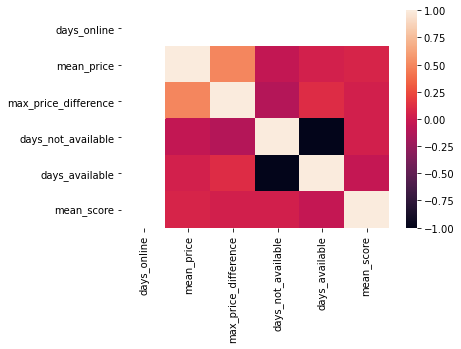

In [57]:
# view correlation betwwen availability and score
sns.heatmap(calendar_scores_summary.corr())

**Conclusion**

- There is no correlation between days_available and mean_score. Meaning, properties are more often booked do not tend to recieve better reviews

## Q2 What is the best length of description?

-The assumption is that a more detailed description is preferrable

In [58]:
#what is the max number of characters?
listings_clean['description'].str.len().max()

1000

In [59]:
#any nulls?
listings_clean['description'].isna().any()

False

<AxesSubplot:xlabel='description', ylabel='review_scores_rating'>

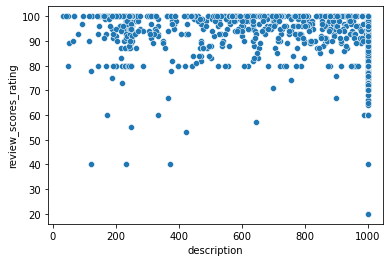

In [60]:
#plot scatterplot to view relation
sns.scatterplot(x=listings_df['description'].str.len(),y=listings_df['review_scores_rating'])

**Conclusion**

- no clear correlation
- review_scores_rating has clear bunching at 80 & 100
- description has bunching at 1000 which makes it difficult to see any correlation beyond this point


# Q3 Does listing price vary seasonaly?

In [61]:
#group mean price per month
grouped_prices=calendar_clean.groupby(pd.Grouper(key='date',freq='1M'))['price'].mean()#apply(lambda x:x['price'].sum()/x['price'].count())
grouped_prices.index=grouped_prices.index.strftime('%B')

In [62]:
grouped_prices

date
January      121.568409
February     124.293927
March        128.644488
April        135.097005
May          139.538183
June         147.473137
July         152.094150
August       150.656594
September    143.255949
October      137.031939
November     135.688738
December     137.251835
January      136.882590
Name: price, dtype: float64

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

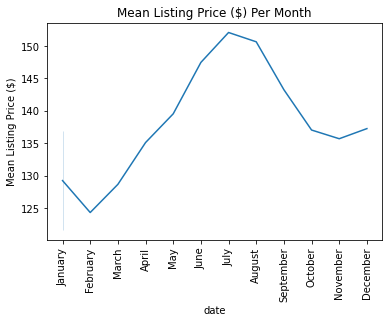

In [63]:
sns.lineplot(x=grouped_prices.index,y=grouped_prices)
plt.title('Mean Listing Price ($) Per Month')
plt.ylabel("Mean Listing Price ($)")
plt.xticks(rotation=90)

**Conclusion**

- Mean Price peaks in summer months

# Q4 How does the size of a property relate to price?



In [64]:
#view correlation with all float columns
float_cols=listings_clean.select_dtypes(include=['float64'])

<AxesSubplot:>

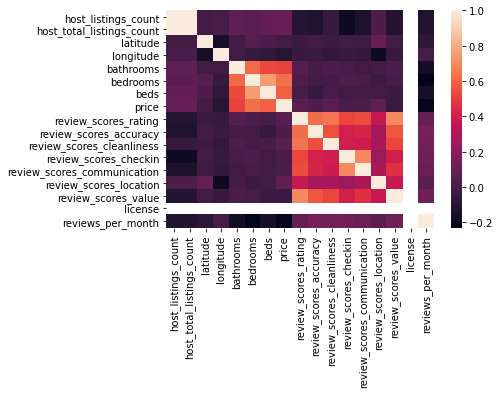

In [65]:
sns.heatmap(float_cols.corr())

- Strong correlation between score featrues
- Strong correlations betwwen columns relating to size of property and price

<AxesSubplot:>

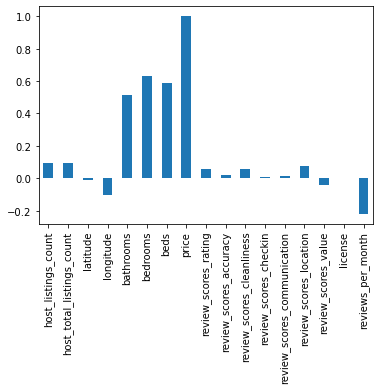

In [66]:
#feature corrleated to price
float_cols.corr().loc['price'].plot(kind='bar')

**Conclusion**

highly corrleated features

- bathrooms
- bedrooms
- beds

Since this is a postive correlation, the more rooms/ beds a property had, the higher the price. This would suggest these features could be used in a model to predict propert price

## Q5 Is price depenednt on location?  

From the previous corr plot, it can be seen that longitude and latitude do not corrlate to price on their own. However, does the geographic location have a bearing on price?

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

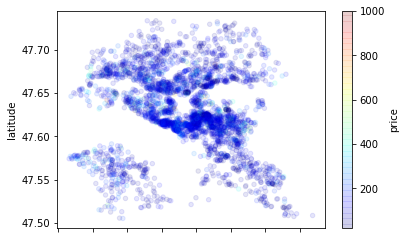

In [67]:
#plot geo data
listings_clean.plot(kind='scatter',x='longitude',y='latitude',alpha=0.1,c="price",cmap=plt.get_cmap("jet"),colorbar=True)

- There are sum small cluster of higher pricing, howvevr this relation is not clear

Can we see difference per neighbour hood?

In [68]:
#what neighboorhood columns are available?
listings_clean[['neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3817 entries, 0 to 3817
Data columns (total 3 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   neighbourhood                 3401 non-null   object
 1   neighbourhood_cleansed        3817 non-null   object
 2   neighbourhood_group_cleansed  3817 non-null   object
dtypes: object(3)
memory usage: 119.3+ KB


In [69]:
listings_clean['neighbourhood_cleansed'].value_counts()

Broadway             397
Belltown             234
Wallingford          167
Fremont              158
Minor                135
                    ... 
Arbor Heights          5
South Beacon Hill      4
Pinehurst              4
South Park             3
Roxhill                2
Name: neighbourhood_cleansed, Length: 87, dtype: int64

In [70]:
listings_clean['neighbourhood_group_cleansed'].value_counts()

Other neighborhoods    793
Capitol Hill           567
Downtown               530
Central Area           369
Queen Anne             295
Ballard                230
West Seattle           203
Rainier Valley         159
University District    122
Beacon Hill            118
Cascade                 89
Northgate               80
Delridge                79
Lake City               67
Magnolia                61
Seward Park             44
Interbay                11
Name: neighbourhood_group_cleansed, dtype: int64

- will use neighbourhood_group_cleansed, due to the more broad categories making for easier visulisation

In [71]:
mean_price_order=listings_clean.groupby('neighbourhood_group_cleansed').median().sort_values('price').index

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 [Text(0, 0, 'Lake City'),
  Text(1, 0, 'Delridge'),
  Text(2, 0, 'Beacon Hill'),
  Text(3, 0, 'Northgate'),
  Text(4, 0, 'Rainier Valley'),
  Text(5, 0, 'University District'),
  Text(6, 0, 'Interbay'),
  Text(7, 0, 'Seward Park'),
  Text(8, 0, 'Ballard'),
  Text(9, 0, 'Other neighborhoods'),
  Text(10, 0, 'Central Area'),
  Text(11, 0, 'Capitol Hill'),
  Text(12, 0, 'West Seattle'),
  Text(13, 0, 'Cascade'),
  Text(14, 0, 'Queen Anne'),
  Text(15, 0, 'Magnolia'),
  Text(16, 0, 'Downtown')])

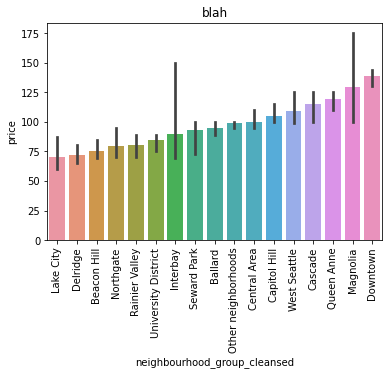

In [72]:
from numpy import median

sns.barplot(x='neighbourhood_group_cleansed',y='price',data=listings_clean, estimator=median,order=mean_price_order)
plt.title("blah")
plt.xticks(rotation=90)

**Conclusion**

- clear distinction in average price per neighbourhood
- Interbay and Magnoilia have large IQR, so may not fit in with the overall trend

neighbourhood_group_cleansed could be used as a feature in predicting prices


# Q6 Can price of property predicted?

- In answering the business questions above, certain features were identified that could help predict a suitable price for a property

In [73]:
#neighbourhood_group_cleanse will have to be split into dummie columns
neighbourhood_dummies=pd.get_dummies(listings_clean['neighbourhood_group_cleansed'], prefix='neighbourhood_group', prefix_sep='_', drop_first=True)
neighbourhood_dummies_cols=list(neighbourhood_dummies.columns)

In [74]:
#add dummies to df
listings_clean= pd.concat([listings_clean, neighbourhood_dummies], axis=1)

#define features for training
features=size_cols+neighbourhood_dummies_cols

#define label
label='price'

#select train/test population
X=listings_clean.copy()[features]
y=listings_clean.copy()[label]

In [75]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [76]:
#split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [77]:
#train model
clf=RandomForestRegressor()
clf.fit(X_train,y_train)

#predict
y_pred=clf.predict(X_test)

In [78]:
from sklearn.metrics import mean_squared_error

In [79]:
#find rmse
mse=mean_squared_error(y_test,y_pred)

rmse=np.sqrt(mse)
rmse

64.42686305807024

In [80]:
from sklearn.model_selection import cross_val_score

In [81]:
#perform cross validation on training set
scores=cross_val_score(clf,X_train,y_train,scoring="neg_mean_squared_error",cv=10)

sqrt_scores=np.sqrt(-scores)

In [82]:
y_test.mean()

128.43804537521814

In [83]:
#mean rmse from cv
sqrt_scores.mean()

64.2393327839451

In [84]:
# std of rmse
sqrt_scores.std()

11.061823525748272

In [85]:
#So score is approx
print(f"Performance of rmse: {sqrt_scores.mean()} +/- {sqrt_scores.std()}")

Performance of rmse: 64.2393327839451 +/- 11.061823525748272


- this is equivelent to score from test, suggesting overfitting

**Conclusion**

- model indicates possibility of making price predictions
- However, with a mean price of 128, and rmse of 64 is a large error
- More work will need to be performed on feature selection, model selection and tuning 